In [1]:
## Loading required modules

import numpy as np
import pandas as pd

In [2]:
## Loading data

df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df.shape

(500, 4)

### Missing Values

In [3]:
## Checking for missing values

df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [4]:
## Loading the missing values data

mv_data = pd.read_csv('missing_value_data.csv')
mv_data.shape

(500, 4)

In [5]:
mv_data.isnull().sum()

Gender    0
Height    1
Weight    2
Index     1
dtype: int64

In [6]:
## Filtering missing value rows 

mv_data[mv_data.isnull().any(axis=1)]

,Gender,Height,Weight,Index
2,Female,NaN,110.0,4.0
6,Male,147.0,NaN,5.0
7,Male,154.0,NaN,5.0
13,Male,155.0,51.0,NaN


In [7]:
## Removing the rows containing missing values

mv_data.dropna()

,Gender,Height,Weight,Index
0,Male,174.0,96.0,4.0
1,Male,189.0,87.0,2.0
3,Female,195.0,104.0,3.0
4,Male,149.0,61.0,3.0
5,Male,189.0,104.0,3.0
...,...,...,...,...
495,Female,150.0,153.0,5.0
496,Female,184.0,121.0,4.0
497,Female,141.0,136.0,5.0
498,Male,150.0,95.0,5.0


In [8]:
## Filling missing values

new_mv_data = mv_data.copy()
new_mv_data = new_mv_data.fillna(0)

In [9]:
## Checking for missing values

new_mv_data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

### Duplicates

In [10]:
## Removing duplicates

df.drop_duplicates()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [11]:
## Removing duplicates by a specific column

df.drop_duplicates(subset = ['Gender'])

,Gender,Height,Weight,Index
0,Male,174,96,4
2,Female,185,110,4


### Adding New Columns & Rows

In [12]:
## Adding new column

df['height_weight_sum'] = df.Height + df.Weight
df.head()

,Gender,Height,Weight,Index,height_weight_sum
0,Male,174,96,4,270
1,Male,189,87,2,276
2,Female,185,110,4,295
3,Female,195,104,3,299
4,Male,149,61,3,210


In [13]:
## Adding a new row

df.loc[501] = df.loc[0].copy()
df.tail()

,Gender,Height,Weight,Index,height_weight_sum
496,Female,184,121,4,305
497,Female,141,136,5,277
498,Male,150,95,5,245
499,Male,173,131,5,304
501,Male,174,96,4,270


### Appending Rows & Columns

In [14]:
l1 = [['X', 10],['Y',20],['Z', 30]]
name_age = pd.DataFrame(l1, columns = ['name','age'])


l2 = [['X', 60],['Y',40],['A', 50]]
name_weight = pd.DataFrame(l2, columns = ['name','weight'])

In [15]:
name_age

,name,age
0,X,10
1,Y,20
2,Z,30


In [16]:
name_weight

,name,weight
0,X,60
1,Y,40
2,A,50


In [17]:
## Adding columns

pd.concat([name_age, name_weight], axis=1)

,name,age,name,weight
0,X,10,X,60
1,Y,20,Y,40
2,Z,30,A,50


In [18]:
## Adding rows

pd.concat([name_age, name_weight], axis=0)

,name,age,weight
0,X,10.0,NaN
1,Y,20.0,NaN
2,Z,30.0,NaN
0,X,NaN,60.0
1,Y,NaN,40.0
2,A,NaN,50.0


### Joins

These are used to combine data from two or more tables using one or more common field(s). The different types of joins are detailed below:

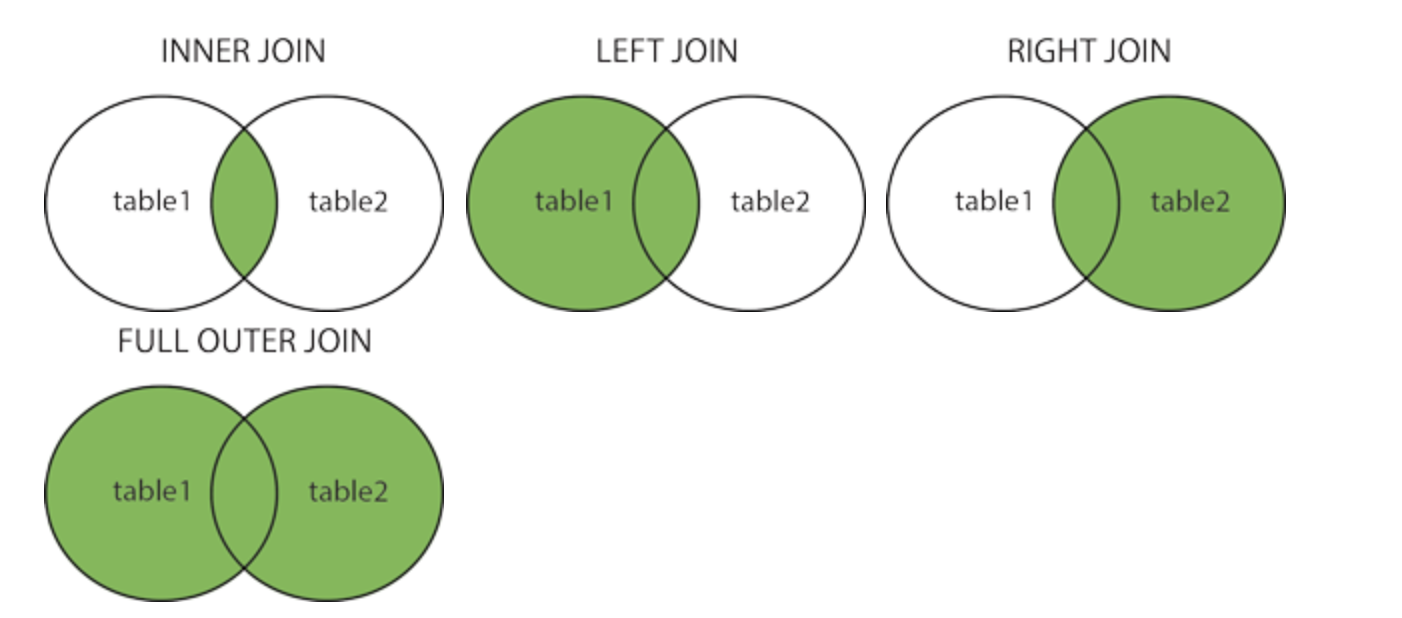

In [19]:
name_age

,name,age
0,X,10
1,Y,20
2,Z,30


In [20]:
name_weight

,name,weight
0,X,60
1,Y,40
2,A,50


In [21]:
## Inner join

pd.merge(name_age, name_weight, how = 'inner', left_on = 'name', right_on = 'name')

,name,age,weight
0,X,10,60
1,Y,20,40


In [22]:
## Left join

pd.merge(name_age, name_weight, how = 'left', left_on = 'name', right_on = 'name')

,name,age,weight
0,X,10,60.0
1,Y,20,40.0
2,Z,30,NaN


In [23]:
## Right join

pd.merge(name_age, name_weight, how = 'right', left_on = 'name', right_on = 'name')

,name,age,weight
0,X,10.0,60
1,Y,20.0,40
2,A,NaN,50


In [24]:
## Outer Join

pd.merge(name_age, name_weight, how = 'outer', left_on = 'name', right_on = 'name')

,name,age,weight
0,X,10.0,60.0
1,Y,20.0,40.0
2,Z,30.0,NaN
3,A,NaN,50.0
